# masking

In [12]:
%load_ext autoreload
%autoreload 2

In [1]:
from plantclef.spark import get_spark

spark = get_spark(
    cores=6,
    memory="100g",
)
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/28 16:01:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/28 16:01:38 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [2]:
import os
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Fri Feb 28 04:01:40 PM EST 2025


In [3]:
# Path and dataset names
scratch_data_path = f"{root}/scratch/plantclef/data/"
project_data_path = f"{root}/p-dsgt_clef2025-0/shared/plantclef/data"

# Define the path to the train and test parquet files
mask_path = f"{scratch_data_path}/masking/test_2024_v1"
test_path = f"{project_data_path}/parquet/test_2024"

# Read the parquet files into a spark DataFrame
mask_df = spark.read.parquet(mask_path)
test_df = spark.read.parquet(test_path)

# Show the data
mask_df.printSchema()
mask_df.show(vertical=True, truncate=100, n=1)
test_df.printSchema()
test_df.show(n=5)

root
 |-- image_name: string (nullable = true)
 |-- leaf_mask: binary (nullable = true)
 |-- flower_mask: binary (nullable = true)
 |-- plant_mask: binary (nullable = true)
 |-- sand_mask: binary (nullable = true)
 |-- wood_mask: binary (nullable = true)
 |-- tape_mask: binary (nullable = true)
 |-- tree_mask: binary (nullable = true)
 |-- rock_mask: binary (nullable = true)
 |-- vegetation_mask: binary (nullable = true)
 |-- sample_id: integer (nullable = true)



-RECORD 0---------------------------------------------------------------------------------------------------------------
 image_name      | CBN-PdlC-F1-20160705.jpg                                                                             
 leaf_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 flower_mask     | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 plant_mask      | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 sand_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 wood_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 tape_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 63 72 27 3A 20 27 7C 75 31 27 2C 20 27 66 6F 72 74 ... 
 tree_mask       | [93 4E 55 4D 

+--------------------+--------------------+--------------------+
|          image_name|                path|                data|
+--------------------+--------------------+--------------------+
|CBN-PdlC-C6-20130...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-Pla-D3-201508...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C3-20190...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C1-20200...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-B2-20160...|/test_2024/images...|[FF D8 FF E0 00 1...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [4]:
# count number of rows
mask_df.count(), test_df.count()

(1695, 1695)

In [5]:
# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = test_df.limit(rows * cols).cache()
mask_subset_df = subset_df.join(mask_df, "image_name")
mask_subset_df.show(vertical=True, truncate=50, n=1)

-RECORD 0-------------------------------------------------------------
 image_name      | CBN-PdlC-B2-20160726.jpg                           
 path            | /test_2024/images/CBN-PdlC-B2-20160726.jpg         
 data            | [FF D8 FF E0 00 10 4A 46 49 46 00 01 01 01 00 4... 
 leaf_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 flower_mask     | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 plant_mask      | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 sand_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 wood_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 tape_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 tree_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 rock_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 vegetation_mask | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 sample_id       | 4                                                  
only s

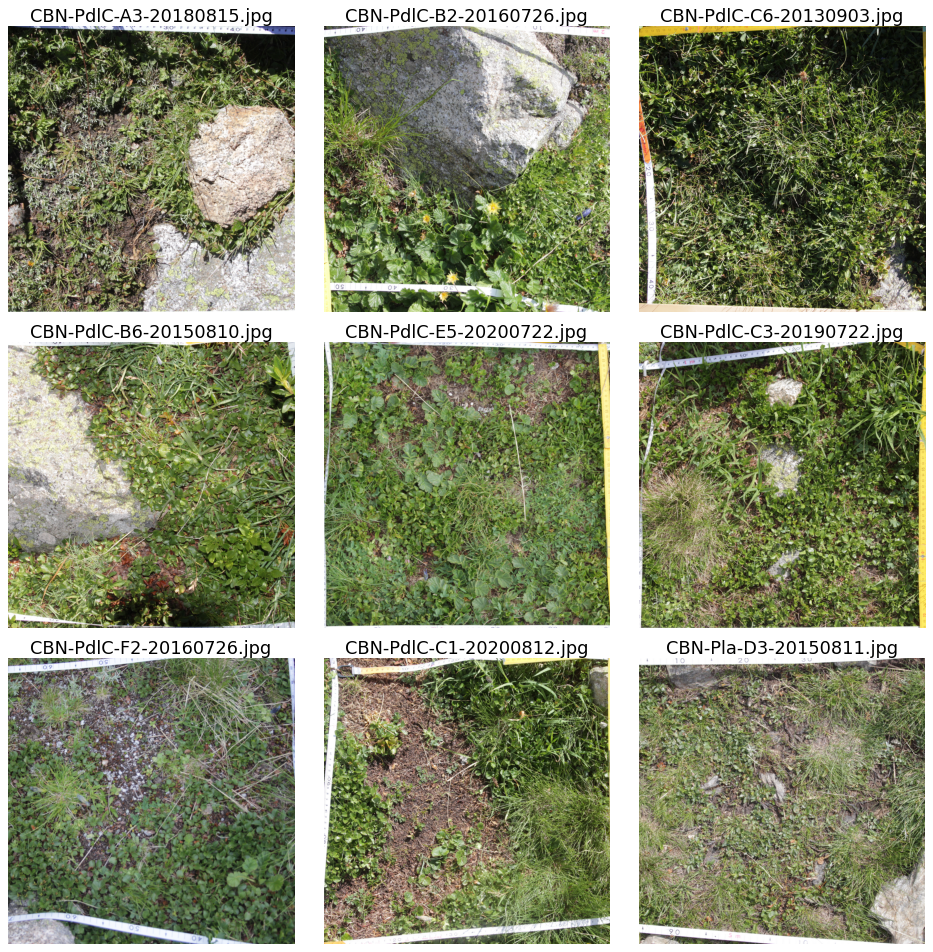

In [6]:
from plantclef.plotting import plot_images_from_binary

# Display the images in a grid with names
plot_images_from_binary(
    mask_subset_df,
    data_col="data",
    label_col="image_name",
    grid_size=(3, 3),
    crop_square=True,
)

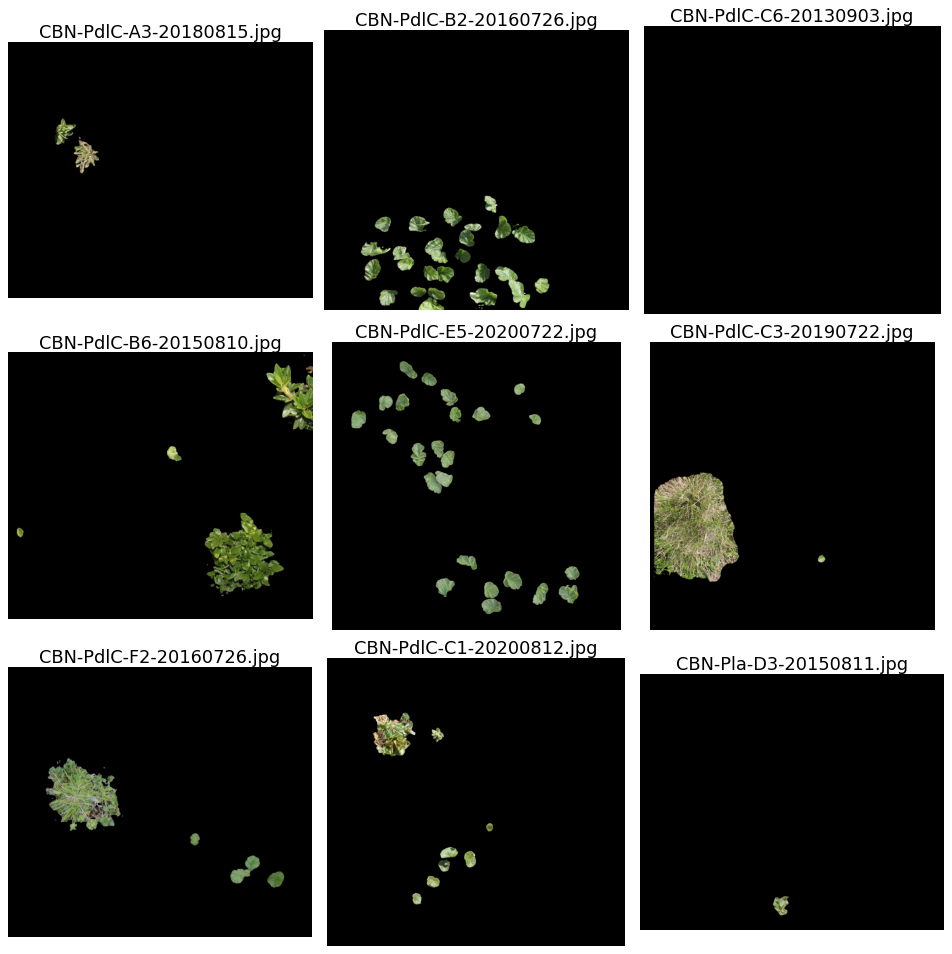

In [7]:
from plantclef.plotting import plot_masks_from_binary

# Display the images in a grid with names
plot_masks_from_binary(
    mask_subset_df,
    image_data_col="data",
    mask_data_col="leaf_mask",
    label_col="image_name",
    grid_size=(3, 3),
    crop_square=True,
)

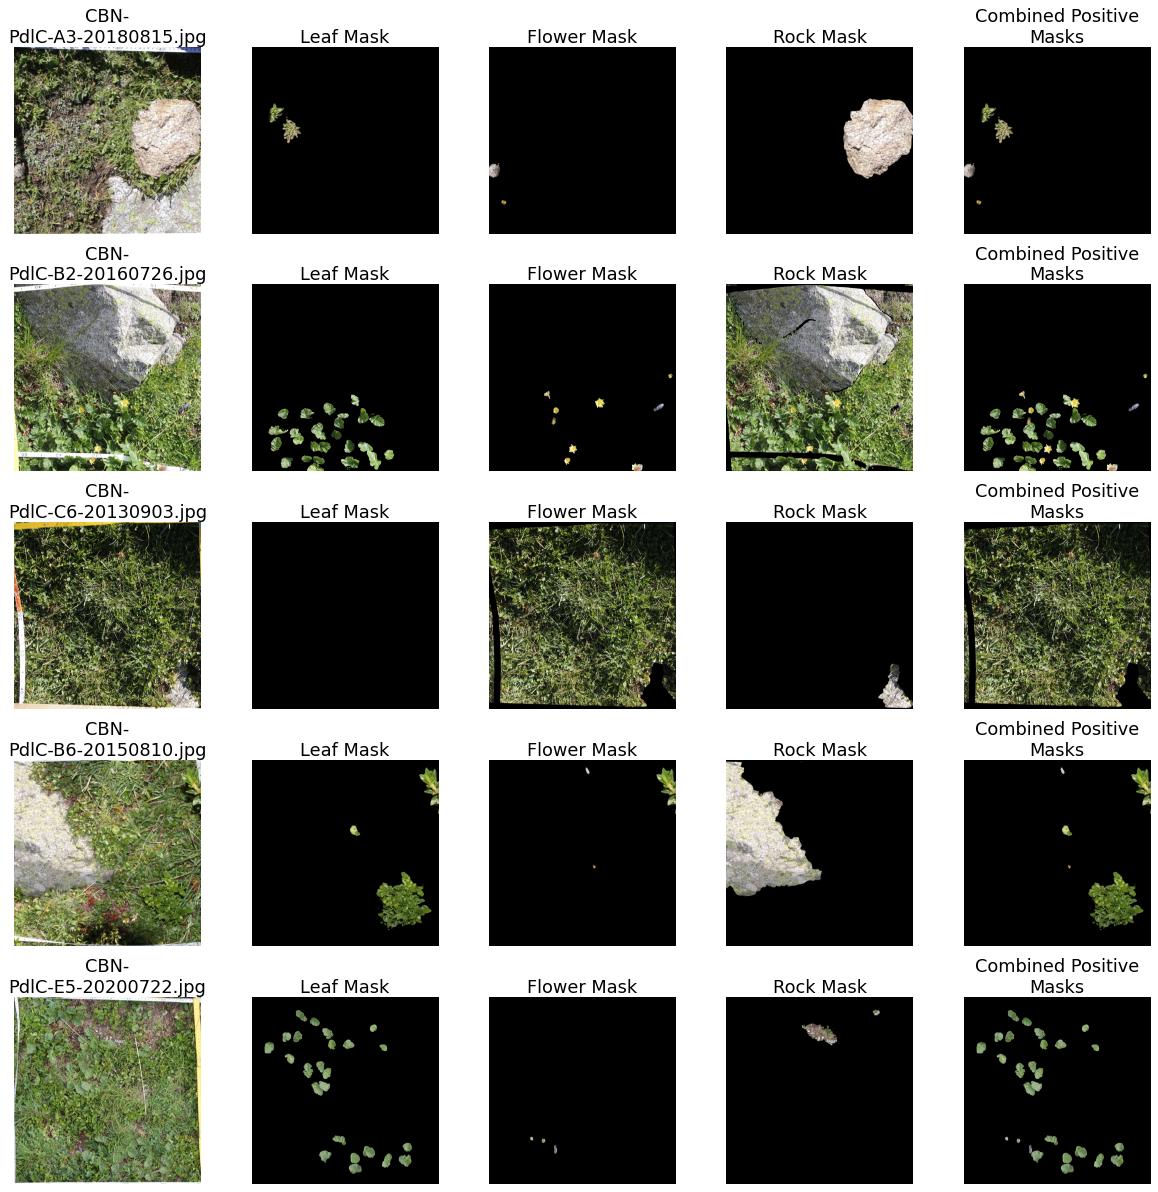

In [8]:
from plantclef.plotting import plot_individual_masks_comparison

# masks we want to display
mask_names = ["leaf_mask", "flower_mask", "rock_mask"]

plot_individual_masks_comparison(
    mask_subset_df,
    mask_names=mask_names,
    label_col="image_name",
    num_rows=5,
    figsize=(15, 15),
    wrap_width=20,
    crop_square=True,
)
# dpi=200

### interesting test images

In [9]:
# interesting test images
images = [
    "CBN-Pyr-03-20230706.jpg",
    # "OPTMix-012-P2-207-20231201.jpg",
    "OPTMix-0178-P1-661-20231006.jpg",
    # "OPTMix-0333-P2-115-20231212.jpg",
    # "OPTMix-0598-P4-104-20231207.jpg",
    # "RNNB-1-4-20240117.jpg",
    # "RNNB-1-7-20230512.jpg",
    # "RNNB-1-8-20230512.jpg",
    # "RNNB-4-2-20240118.jpg",
    "RNNB-8-8-20240118.jpg",
    "CBN-can-E6-20230706.jpg",
    "CBN-Pla-A3-20140812.jpg",
]

In [10]:
from pyspark.sql import functions as F

# get subset of images
selected_df = test_df.where(F.col("image_name").isin(images)).cache()
selected_mask_df = mask_df.join(selected_df, "image_name")
selected_mask_df.show(vertical=True, truncate=50, n=1)

-RECORD 0-------------------------------------------------------------
 image_name      | OPTMix-0178-P1-661-20231006.jpg                    
 leaf_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 flower_mask     | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 plant_mask      | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 sand_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 wood_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 tape_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 tree_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 rock_mask       | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 vegetation_mask | [93 4E 55 4D 50 59 01 00 76 00 7B 27 64 65 73 6... 
 sample_id       | 4                                                  
 path            | /test_2024/images/OPTMix-0178-P1-661-20231006.jpg  
 data            | [FF D8 FF DB 00 43 00 06 04 05 06 05 04 06 06 0... 
only s

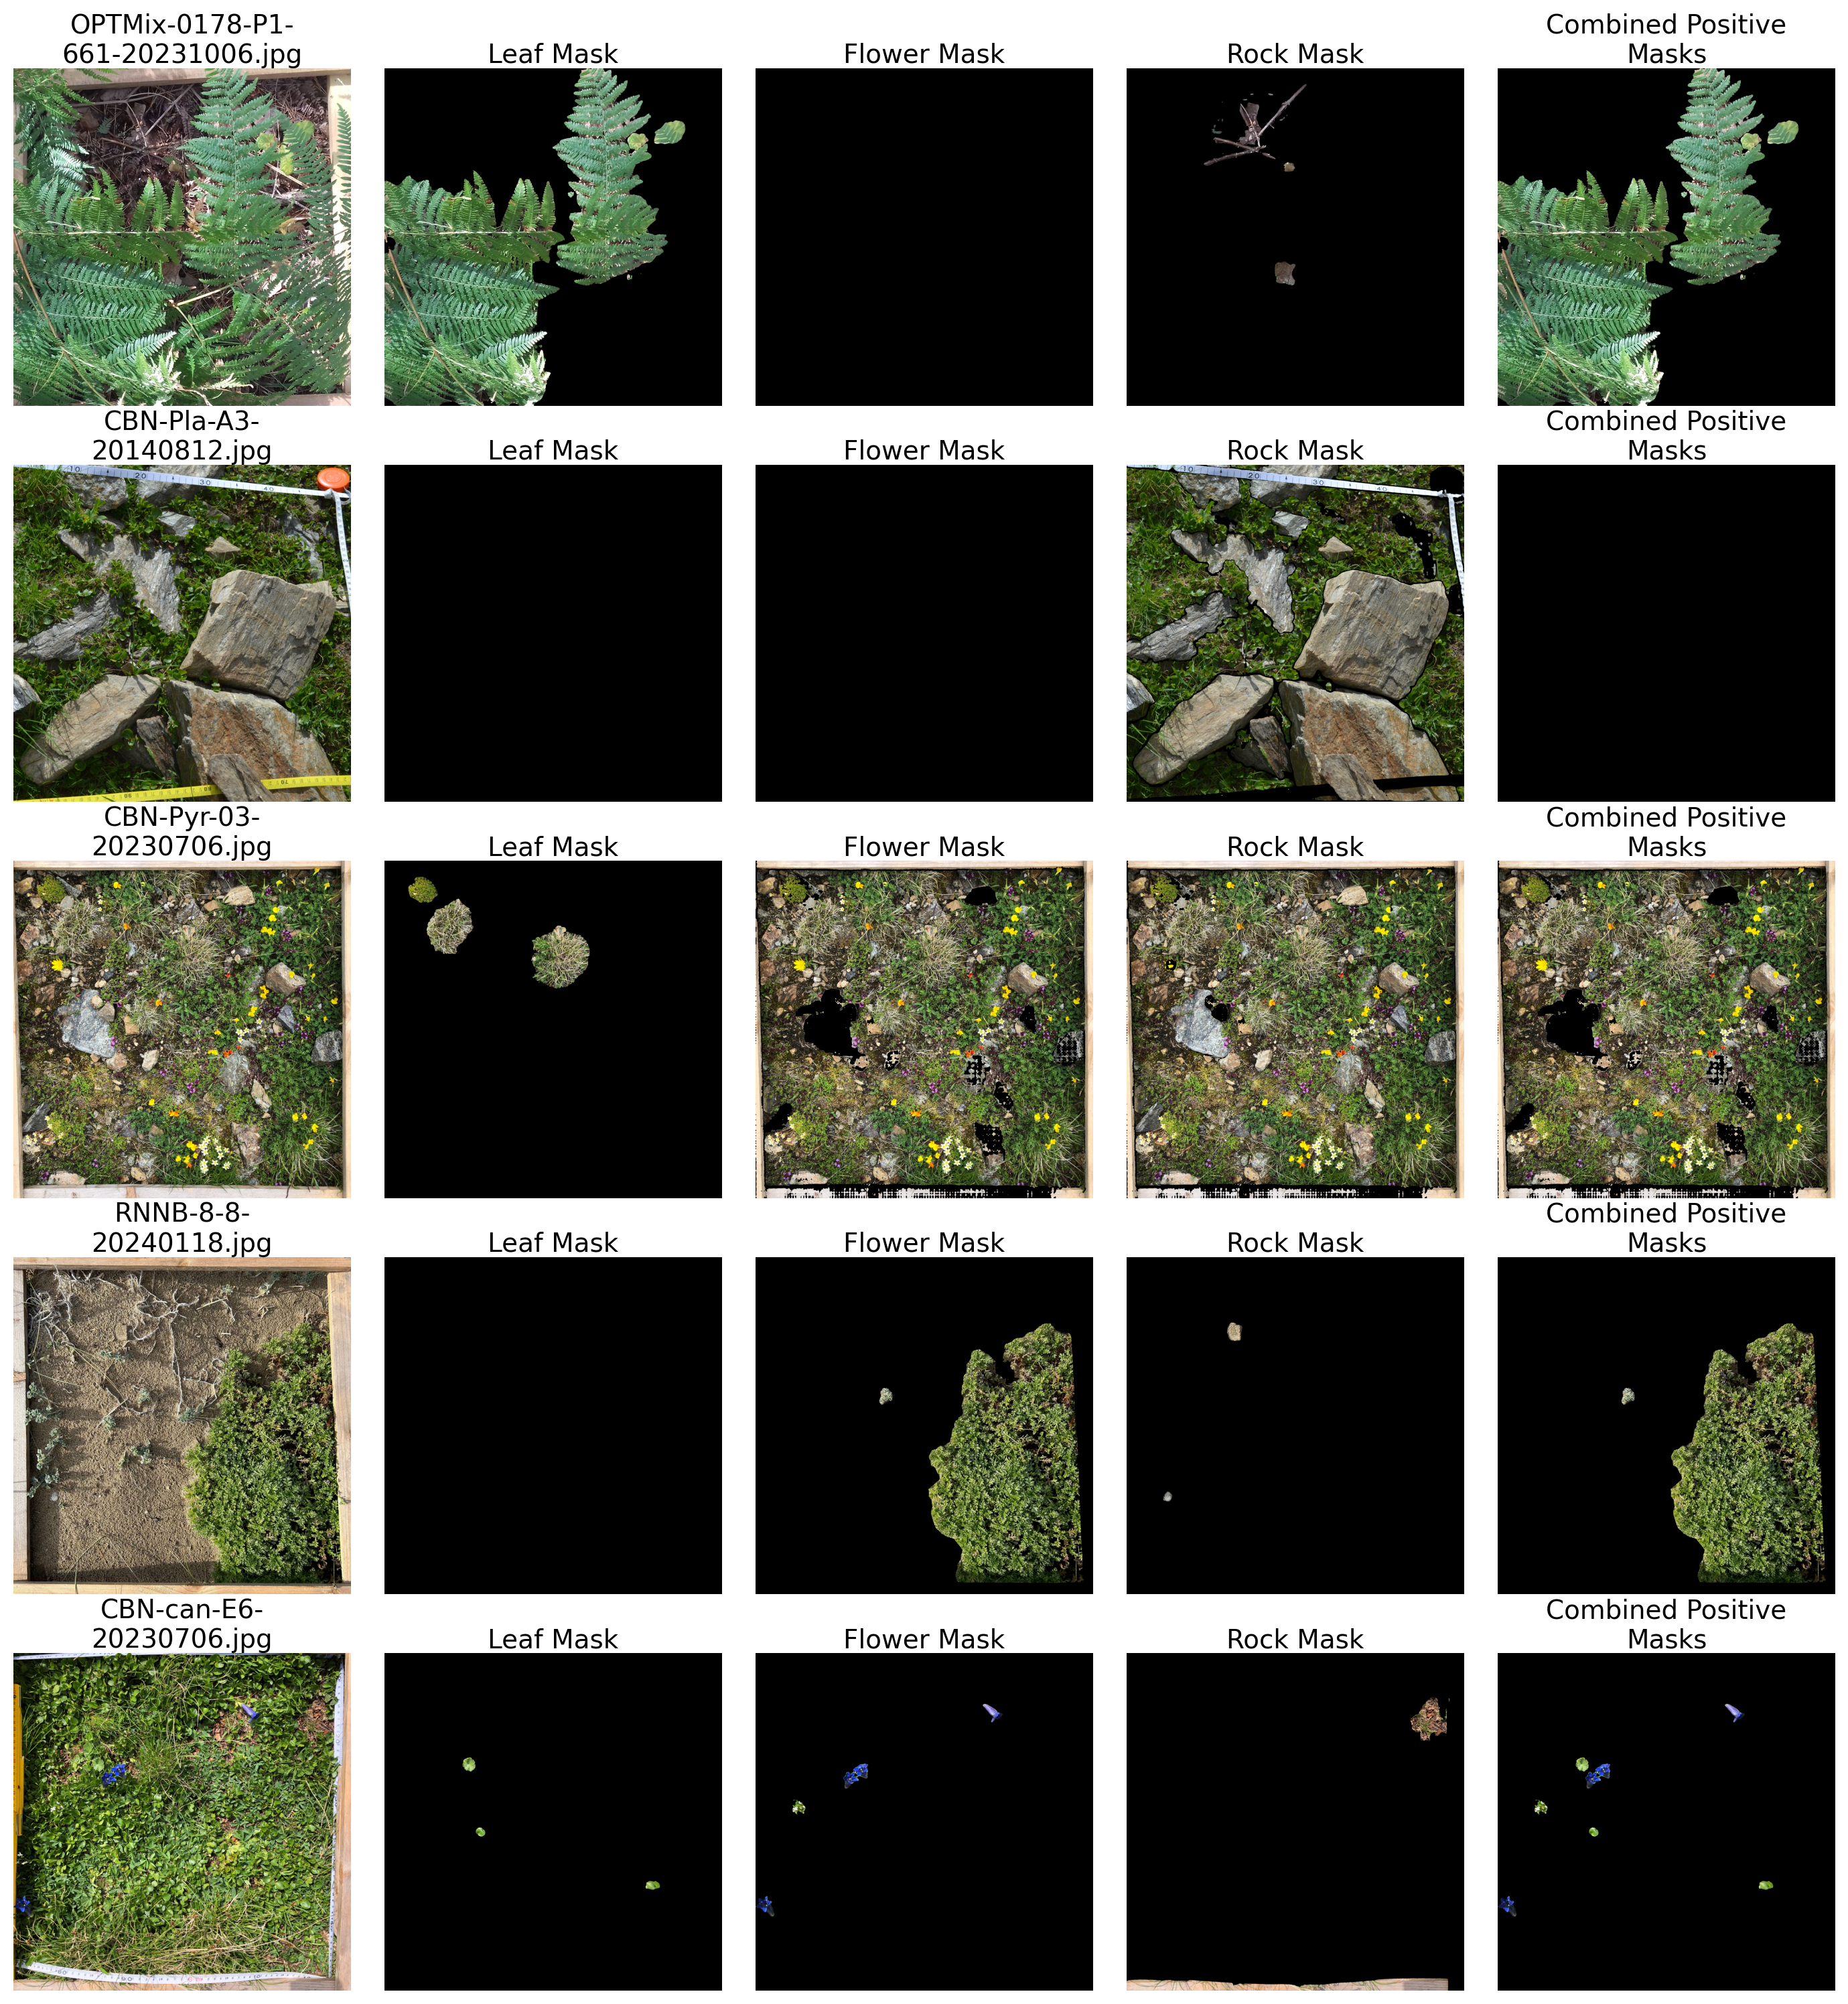

In [11]:
# masks we want to display
mask_names = ["leaf_mask", "flower_mask", "rock_mask"]

plot_individual_masks_comparison(
    selected_mask_df,
    mask_names=mask_names,
    label_col="image_name",
    num_rows=5,
    figsize=(14, 15),
    fontsize=14,
    wrap_width=18,
    crop_square=True,
    dpi=200,
)

In [ ]:
# plot Anthony's masking plot
# plot_mask_percentage()